In [104]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
import os, copy, sys, platform
import matplotlib
import matplotlib as mpl
from matplotlib import rc
path = 'C:\\Windows\\Fonts\\Gothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
rc('font', family=font_name)
rc('figure', figsize = (20,10))
rc('axes', grid = True)
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
rc('xtick', c = 'mistyrose')
rc('ytick', c = 'mistyrose')
color_0 = 'mistyrose'
from bs4 import BeautifulSoup
from selenium import webdriver
import random
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from webdriver_manager.chrome import ChromeDriverManager
from pykrx import stock

In [20]:
codes = stock.get_market_ticker_list('221001', market='ALL')
codes

['060310',
 '095570',
 '006840',
 '054620',
 '265520',
 '211270',
 '027410',
 '282330',
 '032790',
 '138930',
 '001460',
 '001465',
 '013720',
 '001040',
 '079160',
 '035760',
 '311690',
 '00104K',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '051500',
 '058820',
 '023460',
 '056730',
 '065770',
 '083660',
 '000590',
 '012030',
 '404950',
 '367340',
 '367360',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '001530',
 '000210',
 '001880',
 '000215',
 '375500',
 '37550L',
 '37550K',
 '068790',
 '007340',
 '004840',
 '241520',
 '155660',
 '069730',
 '017940',
 '245620',
 '037370',
 '278990',
 '365550',
 '050120',
 '084180',
 '383220',
 '007700',
 '214270',
 '130500',
 '114090',
 '900290',
 '078930',
 '083450',
 '006360',
 '001250',
 '007070',
 '078935',
 '297890',
 '078150',
 '012630',
 '039570',
 '089470',
 '294870',
 '267250',
 '097230',
 '195940',
 '014790',
 '028300',
 '003580',
 '343090',
 '067630',
 '047920',
 '115450',
 '204320',
 '060980',
 '011200',

In [22]:
### 네이버 금융 Financial Summary 불러오기 ###
def NFSS(code, fin_type='0', freq_type='Q') :  #Naver Financial Summary Screener
# code: 종목코드
# fin_type = '0': 재무제표 종류 (0: 주재무제표, 1: GAAP개별, 2: GAAP연결, 3: IFRS별도, 4:IFRS연결)
# freq_type = 'Y': 기간 (Y:년, Q:분기)
    print('running : ', code, '...')
    url = f'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={code}&fin_typ={fin_type}&freq_typ={freq_type}'

    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)
    driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[4]')[0].click()
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.select('table')

    # html → 문자열
    table_html = str(table)

    # pandas의 read_html 로 테이블 정보 읽기
    table_df_list = pd.read_html(table_html)

    # Data Frame 선택
    fs = table_df_list[12] # 12 : Financial Summary
    
    fs.set_index(('주요재무정보','주요재무정보'), inplace=True)
    fs.index.rename('주요재무정보', inplace=True) #주요재무정보로 인덱싱
    fs.columns = fs.columns.droplevel(0) # 불필요한 열 제거
    fs.columns = [column[:-10] for column in fs.columns]
    driver.close()
    return fs

In [23]:
# 삼성전자 Financial Summary
print('삼성전자(KOSPI) Financial Summary')
temp_00 = NFSS('005930')

삼성전자(KOSPI) Financial Summary
running :  005930 ...


C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[4]')[0].click()


In [24]:
# 3S(KOSDAQ) Financial Summary
print('3S(KOSDAQ) Financial Summary')
temp_01 = NFSS('060310')

3S(KOSDAQ) Financial Summary
running :  060310 ...


C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[4]')[0].click()


In [25]:
# Formular of NaN(Not a Number) Check
if temp_00.iloc[0][-1] == temp_00.iloc[0][-1]:
    print("005930's sales expectaion of '23 isn't nan")

if temp_00.iloc[0][-1] != temp_00.iloc[0][-1]:
    print("005930's sales expectaion of '23 is nan")

if temp_01.iloc[0][-1] == temp_01.iloc[0][-1]:
    print("060310's sales expectaion of '23 isn't nan")

if temp_01.iloc[0][-1] != temp_01.iloc[0][-1]:
    print("060310's sales expectaion of '23 is nan")

005930's sales expectaion of '23 isn't nan
060310's sales expectaion of '23 is nan


In [26]:
non_consen_lst = []
for code in codes :
    if code[-3] == '5':  # 시간 상 1/10개만 sampling 해서 추출(code 끝자리 0인 종목만)
        try :  # 종목번호가 없거나 틀릴 경우에 대한 예외처리
            E_Sales = NFSS(code).iloc[0][-1]
        except :  # 종목번호가 없거나 틀릴 경우에는 해당 종목 Pass
            pass
        if E_Sales != E_Sales :  # NaN 체크: 매출액 예상치가 NaN이면 컨센이 없는 것
            non_consen_lst.append(code)  # NaN이면 리스트에 추가
non_consen_lst

running :  060310 ...


C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[4]')[0].click()


running :  095570 ...
running :  006840 ...
running :  054620 ...
running :  265520 ...
running :  211270 ...
running :  027410 ...
running :  282330 ...
running :  032790 ...
running :  138930 ...
running :  001460 ...
running :  013720 ...
running :  001040 ...
running :  079160 ...
running :  035760 ...
running :  311690 ...
running :  000120 ...
running :  011150 ...
running :  097950 ...
running :  051500 ...
running :  058820 ...
running :  023460 ...
running :  056730 ...
running :  065770 ...
running :  083660 ...
running :  000590 ...
running :  012030 ...
running :  404950 ...
running :  367340 ...
running :  367360 ...
running :  016610 ...
running :  005830 ...
running :  000990 ...
running :  139130 ...
running :  001530 ...
running :  000210 ...
running :  001880 ...
running :  375500 ...
running :  068790 ...
running :  007340 ...
running :  004840 ...
running :  241520 ...
running :  155660 ...
running :  069730 ...
running :  017940 ...
running :  245620 ...
running : 

running :  042420 ...
running :  950220 ...
running :  311390 ...
running :  085910 ...
running :  092730 ...
running :  290660 ...
running :  306620 ...
running :  153460 ...
running :  007390 ...
running :  033640 ...
running :  330860 ...
running :  005720 ...
running :  002350 ...
running :  089140 ...
running :  137940 ...
running :  396270 ...
running :  348210 ...
running :  225570 ...
running :  217270 ...
running :  251270 ...
running :  317860 ...
running :  104620 ...
running :  090350 ...
running :  000320 ...
running :  194700 ...
running :  285490 ...
running :  229500 ...
running :  106520 ...
running :  376930 ...
running :  278650 ...
running :  006280 ...
running :  142280 ...
running :  234690 ...
running :  005250 ...
running :  065560 ...
running :  004370 ...
running :  072710 ...
running :  054050 ...
running :  069140 ...
running :  040160 ...
running :  332290 ...
running :  126870 ...
running :  060260 ...
running :  012340 ...
running :  214870 ...
running : 

running :  005360 ...
running :  080420 ...
running :  080160 ...
running :  204210 ...
running :  100030 ...
running :  087260 ...
running :  101330 ...
running :  012860 ...
running :  363260 ...
running :  348030 ...
running :  250060 ...
running :  288980 ...
running :  033200 ...
running :  009680 ...
running :  118990 ...
running :  006920 ...
running :  009580 ...
running :  001810 ...
running :  009200 ...
running :  135160 ...
running :  322970 ...
running :  033920 ...
running :  008420 ...
running :  279600 ...
running :  095500 ...
running :  025560 ...
running :  218150 ...
running :  007120 ...
running :  396690 ...
running :  353490 ...
running :  357250 ...
running :  100790 ...
running :  412930 ...
running :  085620 ...
running :  006800 ...
running :  208890 ...
running :  049950 ...
running :  207760 ...
running :  002840 ...
running :  268280 ...
running :  107590 ...
running :  134380 ...
running :  003650 ...
running :  059090 ...
running :  214610 ...
running : 

running :  232830 ...
running :  139050 ...
running :  016590 ...
running :  290520 ...
running :  029530 ...
running :  004970 ...
running :  001000 ...
running :  025870 ...
running :  215600 ...
running :  065350 ...
running :  011930 ...
running :  005390 ...
running :  004170 ...
running :  035510 ...
running :  034300 ...
running :  031430 ...
running :  031440 ...
running :  006880 ...
running :  002800 ...
running :  344050 ...
running :  419270 ...
running :  430220 ...
running :  005800 ...
running :  001720 ...
running :  009270 ...
running :  017000 ...
running :  002700 ...
running :  012790 ...
running :  138070 ...
running :  226330 ...
running :  019170 ...
running :  002870 ...
running :  404990 ...
running :  293940 ...
running :  418210 ...
running :  333050 ...
running :  366330 ...
running :  393360 ...
running :  405640 ...
running :  055550 ...
running :  056700 ...
running :  187270 ...
running :  004080 ...
running :  243840 ...
running :  257720 ...
running : 

running :  006740 ...
running :  012280 ...
running :  265560 ...
running :  012160 ...
running :  036000 ...
running :  250930 ...
running :  053280 ...
running :  015360 ...
running :  122640 ...
running :  900300 ...
running :  045060 ...
running :  080520 ...
running :  007310 ...
running :  039830 ...
running :  322310 ...
running :  046120 ...
running :  014940 ...
running :  002630 ...
running :  065500 ...
running :  271560 ...
running :  001800 ...
running :  010470 ...
running :  352910 ...
running :  053980 ...
running :  052420 ...
running :  241790 ...
running :  329020 ...
running :  039200 ...
running :  226400 ...
running :  031510 ...
running :  048260 ...
running :  138080 ...
running :  080580 ...
running :  067170 ...
running :  353590 ...
running :  173130 ...
running :  049480 ...
running :  394280 ...
running :  309930 ...
running :  244460 ...
running :  226950 ...
running :  057540 ...
running :  131030 ...
running :  082210 ...
running :  109080 ...
running : 

running :  004910 ...
running :  004700 ...
running :  001550 ...
running :  000480 ...
running :  120030 ...
running :  034940 ...
running :  067000 ...
running :  018470 ...
running :  002600 ...
running :  185750 ...
running :  063160 ...
running :  001630 ...
running :  033340 ...
running :  036930 ...
running :  044380 ...
running :  239340 ...
running :  051980 ...
running :  072020 ...
running :  000440 ...
running :  078650 ...
running :  228760 ...
running :  314130 ...
running :  013890 ...
running :  389030 ...
running :  043610 ...
running :  263860 ...
running :  303030 ...
running :  036180 ...
running :  208350 ...
running :  144510 ...
running :  382480 ...
running :  382800 ...
running :  299480 ...
running :  051160 ...
running :  053050 ...
running :  119850 ...
running :  270520 ...
running :  065060 ...
running :  204840 ...
running :  013870 ...
running :  071320 ...
running :  311320 ...
running :  035000 ...
running :  388050 ...
running :  219750 ...
running : 

Exception ignored in: <function Service.__del__ at 0x000002260DB80CA0>
Traceback (most recent call last):
  File "C:\Users\C.W Lee\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 172, in __del__
    self.stop()
  File "C:\Users\C.W Lee\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 147, in stop
    self.send_remote_shutdown_command()
  File "C:\Users\C.W Lee\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 128, in send_remote_shutdown_command
    if not self.is_connectable():
  File "C:\Users\C.W Lee\anaconda3\lib\site-packages\selenium\webdriver\common\service.py", line 116, in is_connectable
    return utils.is_connectable(self.port)
  File "C:\Users\C.W Lee\anaconda3\lib\site-packages\selenium\webdriver\common\utils.py", line 107, in is_connectable
    socket_ = socket.create_connection((host, port), 1)
  File "C:\Users\C.W Lee\anaconda3\lib\socket.py", line 796, in create_connection
    sock.connect(sa)
Keyboar

running :  145270 ...
running :  036030 ...
running :  064820 ...
running :  347140 ...
running :  256940 ...
running :  024880 ...
running :  042040 ...
running :  054410 ...
running :  258610 ...
running :  274090 ...
running :  402420 ...
running :  217600 ...
running :  089010 ...
running :  220260 ...
running :  176590 ...
running :  052400 ...
running :  402030 ...
running :  391710 ...
running :  046070 ...
running :  047770 ...
running :  078940 ...
running :  080530 ...
running :  224060 ...
running :  417310 ...
running :  357120 ...
running :  104540 ...
running :  027050 ...
running :  290510 ...
running :  007810 ...
running :  190650 ...
running :  101670 ...
running :  123410 ...
running :  003690 ...
running :  036690 ...
running :  049430 ...
running :  183300 ...
running :  041960 ...
running :  089890 ...
running :  009730 ...
running :  189350 ...
running :  082660 ...
running :  192820 ...
running :  044820 ...
running :  222040 ...
running :  241710 ...
running : 

running :  003350 ...
running :  030520 ...
running :  052600 ...
running :  011500 ...
running :  002390 ...
running :  256150 ...
running :  092460 ...
running :  053690 ...
running :  042700 ...
running :  008930 ...
running :  128940 ...
running :  047080 ...
running :  009240 ...
running :  020000 ...
running :  003680 ...
running :  105630 ...
running :  069640 ...
running :  016450 ...
running :  010420 ...
running :  009180 ...
running :  114810 ...
running :  070590 ...
running :  213500 ...
running :  014680 ...
running :  004710 ...
running :  004150 ...
running :  025750 ...
running :  226440 ...
running :  042520 ...
running :  004960 ...
running :  011700 ...
running :  078350 ...
running :  045100 ...
running :  001750 ...
running :  018880 ...
running :  009420 ...
running :  014130 ...
running :  046110 ...
running :  024740 ...
running :  005860 ...
running :  300720 ...
running :  123840 ...
running :  002220 ...
running :  006390 ...
running :  003300 ...
running : 

['060310',
 '095570',
 '006840',
 '054620',
 '265520',
 '211270',
 '027410',
 '032790',
 '138930',
 '001460',
 '013720',
 '001040',
 '079160',
 '035760',
 '311690',
 '011150',
 '051500',
 '058820',
 '023460',
 '056730',
 '065770',
 '083660',
 '000590',
 '012030',
 '404950',
 '367340',
 '367360',
 '016610',
 '005830',
 '139130',
 '001530',
 '000210',
 '001880',
 '375500',
 '068790',
 '007340',
 '004840',
 '241520',
 '155660',
 '069730',
 '017940',
 '245620',
 '037370',
 '278990',
 '365550',
 '050120',
 '084180',
 '383220',
 '007700',
 '214270',
 '130500',
 '114090',
 '900290',
 '078930',
 '083450',
 '001250',
 '297890',
 '078150',
 '012630',
 '039570',
 '089470',
 '294870',
 '267250',
 '097230',
 '195940',
 '028300',
 '003580',
 '343090',
 '067630',
 '047920',
 '115450',
 '060980',
 '011200',
 '036640',
 '082740',
 '335870',
 '351340',
 '388790',
 '405350',
 '424760',
 '426550',
 '003560',
 '095340',
 '099520',
 '175330',
 '950170',
 '234080',
 '067290',
 '001060',
 '096760',
 '035900',

In [34]:
# 빠른 인덱싱의 딕셔너리 자료형을 이용한 종목명 붙여주기
non_consen_stocks = {}
for i, code in enumerate(non_consen_lst) :
    non_consen_stocks[code] = stock.get_market_ticker_name(code)
    
non_consen_stocks

{'060310': '3S',
 '095570': 'AJ네트웍스',
 '006840': 'AK홀딩스',
 '054620': 'APS홀딩스',
 '265520': 'AP시스템',
 '211270': 'AP위성',
 '027410': 'BGF',
 '032790': 'BNGT',
 '138930': 'BNK금융지주',
 '001460': 'BYC',
 '013720': 'CBI',
 '001040': 'CJ',
 '079160': 'CJ CGV',
 '035760': 'CJ ENM',
 '311690': 'CJ 바이오사이언스',
 '011150': 'CJ씨푸드',
 '051500': 'CJ프레시웨이',
 '058820': 'CMG제약',
 '023460': 'CNH',
 '056730': 'CNT85',
 '065770': 'CS',
 '083660': 'CSA 코스믹',
 '000590': 'CS홀딩스',
 '012030': 'DB',
 '404950': 'DB금융스팩10호',
 '367340': 'DB금융스팩8호',
 '367360': 'DB금융스팩9호',
 '016610': 'DB금융투자',
 '005830': 'DB손해보험',
 '139130': 'DGB금융지주',
 '001530': 'DI동일',
 '000210': 'DL',
 '001880': 'DL건설',
 '375500': 'DL이앤씨',
 '068790': 'DMS',
 '007340': 'DN오토모티브',
 '004840': 'DRB동일',
 '241520': 'DSC인베스트먼트',
 '155660': 'DSR',
 '069730': 'DSR제강',
 '017940': 'E1',
 '245620': 'EDGC',
 '037370': 'EG',
 '278990': 'EMB',
 '365550': 'ESR켄달스퀘어리츠',
 '050120': 'ES큐브',
 '084180': 'EV수성',
 '383220': 'F&F',
 '007700': 'F&F홀딩스',
 '214270': 'FSN',
 '130

In [36]:
print(f'The Number of Total KRX Companies : {len(codes)}')
print(f'The Number of None Consensus Stocks : {len(non_consen_stocks)}' )
print(f'The Number of Stocks with Consensus : {len(codes) - len(non_consen_stocks)}' )

The Number of Total KRX Companies : 2651
The Number of None Consensus Stocks : 2369
The Number of Stocks with Consensus : 282


In [53]:
screening_lst = []
columns = []
for a, code in enumerate(non_consen_stocks) :
    if a % 400 == random.randint(0, 399) :
        screening_lst.append(code)
        columns.append(non_consen_stocks[code])

In [54]:
screening_lst, columns

(['030190', '142760', '068270', '225430', '238490'],
 ['NICE평가정보', '비엘', '셀트리온', '케이엠제약', '힘스'])

In [58]:
for i in range(len(screening_lst)):
    globals()[f'df{i}'] = NFSS(screening_lst[int(f'{i}')])

running :  030190 ...


C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())
C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_33748/3413328379.py:11: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[4]')[0].click()


running :  142760 ...
running :  068270 ...
running :  225430 ...
running :  238490 ...


In [61]:
#영업이익증가율 만들어서 DF에 추가하는 함수 선언 및 실행
def OPGR(df) :
    new_data = [np.NaN]
    for i in range(len(df.columns)) :
        if i == 7 :
            pass
        else : 
            if df.iloc[1, i] < 0 : 
                x = 1
                new_data.append(round((df.iloc[1, i + 1] - df.iloc[1, i]) / x * 100, 2))
            else :
                x = df.iloc[1, i]
                new_data.append(round((df.iloc[1, i + 1] - df.iloc[1, i]) / x * 100, 2))
    df.loc['영업이익증가율'] = new_data
    return df

for i in range(len(screening_lst)) :
    OPGR(globals()[f'df{i}'])

In [62]:
#EPS성장율 만들어서 DF에 추가하는 함수 선언 및 실행
def EPSGR(df) :
    new_data = [np.NaN]
    for i in range(len(df.columns)) :
        if i == 7 :
            pass
        else : 
            if df.iloc[25, i] < 0 : 
                x = 1
                new_data.append(round((df.iloc[25, i + 1] - df.iloc[25, i]) / x * 100, 2))
            else :
                x = df.iloc[25, i]
                new_data.append(round((df.iloc[25, i + 1] - df.iloc[25, i]) / x * 100, 2))
    df.loc['EPS성장율'] = new_data
    return df

for i in range(len(screening_lst)) :
    EPSGR(globals()[f'df{i}'])

,NICE평가정보,비엘,셀트리온,케이엠제약,힘스
2021/06,NaN,NaN,NaN,NaN,NaN
2021/09,-25.24,-800.0,0.49,0.00,5800.00
2021/12,10.39,-2700.0,35.37,1000.00,-235.29
2022/03,25.88,3400.0,-35.90,-111.11,4700.00
2022/06,0.93,-300.0,39.85,-300.00,-2200.00
2022/09(E),-27.78,NaN,3.67,NaN,NaN
2022/12(E),10.26,NaN,15.71,NaN,NaN
2023/03(E),NaN,NaN,NaN,NaN,NaN


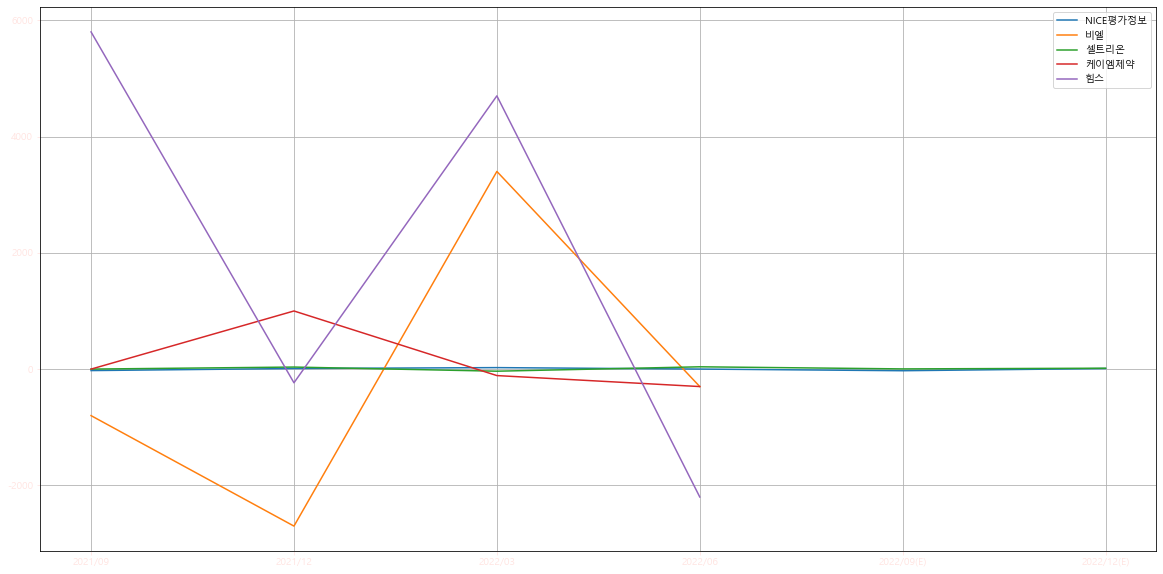

In [67]:
#영업이익증가율 PLOT 만들기
opgr = pd.DataFrame()
for j, i in enumerate(screening_lst) : 
    opgr[f'{i}'] = globals()[f'df{j}'].loc['영업이익증가율']
opgr.columns = columns
opgr.plot(figsize = (20,10))
opgr

,NICE평가정보,비엘,셀트리온,케이엠제약,힘스
2021/06,NaN,NaN,NaN,NaN,NaN
2021/09,-24.43,16700.00,7.84,-475.0,49700.00
2021/12,0.51,-1129.55,-7.89,1700.0,-198.27
2022/03,28.64,35800.00,-5.07,-150.0,31300.00
2022/06,4.69,-8400.00,54.75,-1600.0,-8100.00
2022/09(E),NaN,NaN,-21.64,NaN,NaN
2022/12(E),NaN,NaN,0.49,NaN,NaN
2023/03(E),NaN,NaN,NaN,NaN,NaN


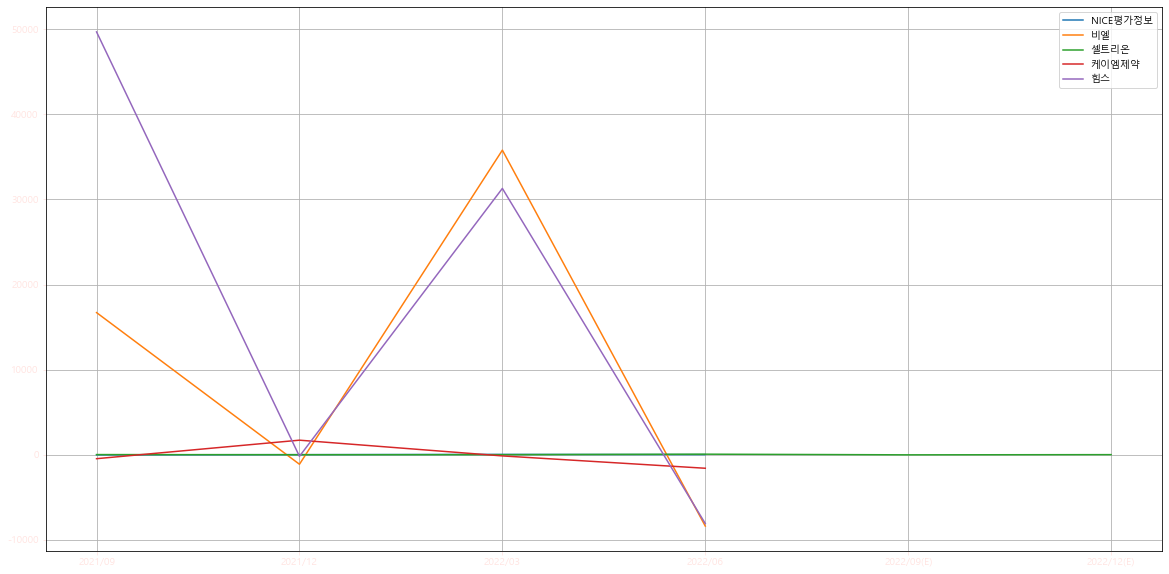

In [70]:
#EPS성장율 PLOT 만들기
epsg = pd.DataFrame()
for j, i in enumerate(screening_lst) : 
    epsg[f'{i}'] = globals()[f'df{j}'].loc['EPS성장율']
epsg.columns = columns
epsg.plot()
epsg

In [109]:
# 1년전으로 스크리닝 시작일 세팅
import datetime
dt = datetime.datetime.now()
print(dt_now)
year = str(dt.year)
month = str(dt.month)
day = str(f'{dt.day:02}')
dt_now = year + '-' + month + '-' + day
year = str(dt.year - 1)
dt_pst = year + '-' + month + '-' + day
print(f'dt_now : {dt_now}, dt_pst : {dt_pst}')

2021-10-03
dt_now : 2022-10-03, dt_pst : 2021-10-03


In [110]:
mc = pd.DataFrame()
mc_rs = pd.DataFrame()
for j, i in enumerate(screening_lst) :
    print(j, i)
    globals()[f'mc{j}'] = pd.DataFrame()

    globals()[f'mc{j}'][i] = stock.get_market_cap(dt_pst, dt_now, i)['시가총액'] / 100000000  # 단위 : 억(원)

    globals()[f'mc_{j}'] = globals()[f'mc{j}'] / globals()[f'mc{j}'].iloc[0].item() * 100
    mc = pd.concat([mc, globals()[f'mc{j}']], axis=1)
    mc = mc.fillna(method = 'bfill')
    mc_rs = pd.concat([mc_rs, globals()[f'mc_{j}']], axis=1)
    mc_rs = mc_rs.fillna(method = 'bfill')
mc.columns = columns
mc_rs.columns = columns

0 030190
1 142760
2 068270
3 225430
4 238490


In [111]:
# 종목별 시가총액
mc

,NICE평가정보,비엘,셀트리온,케이엠제약,힘스
날짜,,,,,
2021-10-05,12446.53810,3393.420862,300697.68088,585.628050,963.802507
2021-10-06,12021.53436,3091.172850,292421.59792,577.261935,923.078458
2021-10-07,12142.96400,3242.296856,293800.94508,623.275567,945.702930
2021-10-08,12142.96400,3489.590684,308973.76384,613.515100,919.684787
2021-10-12,12355.46587,3146.127034,295869.96582,593.994165,888.010526
...,...,...,...,...,...
2022-09-26,8864.36372,1457.642471,231602.61957,349.982478,694.571290
2022-09-27,8621.50444,1558.277981,233010.53823,348.588125,709.277197
2022-09-28,8135.78588,1545.698543,234418.45689,334.644600,762.444706


In [112]:
# 기준일부터 현재까지의 상대강도
mc_rs

,NICE평가정보,비엘,셀트리온,케이엠제약,힘스
날짜,,,,,
2021-10-05,100.000000,100.000000,100.000000,100.000000,100.000000
2021-10-06,96.585366,91.093117,97.247706,98.571429,95.774648
2021-10-07,97.560976,95.546559,97.706422,106.428571,98.122066
2021-10-08,97.560976,102.834008,102.752294,104.761905,95.422535
2021-10-12,99.268293,92.712551,98.394495,101.428571,92.136150
...,...,...,...,...,...
2022-09-26,71.219512,42.954957,77.021751,59.761905,72.065728
2022-09-27,69.268293,45.920563,77.489969,59.523810,73.591549
2022-09-28,65.365854,45.549863,77.958186,57.142857,79.107981


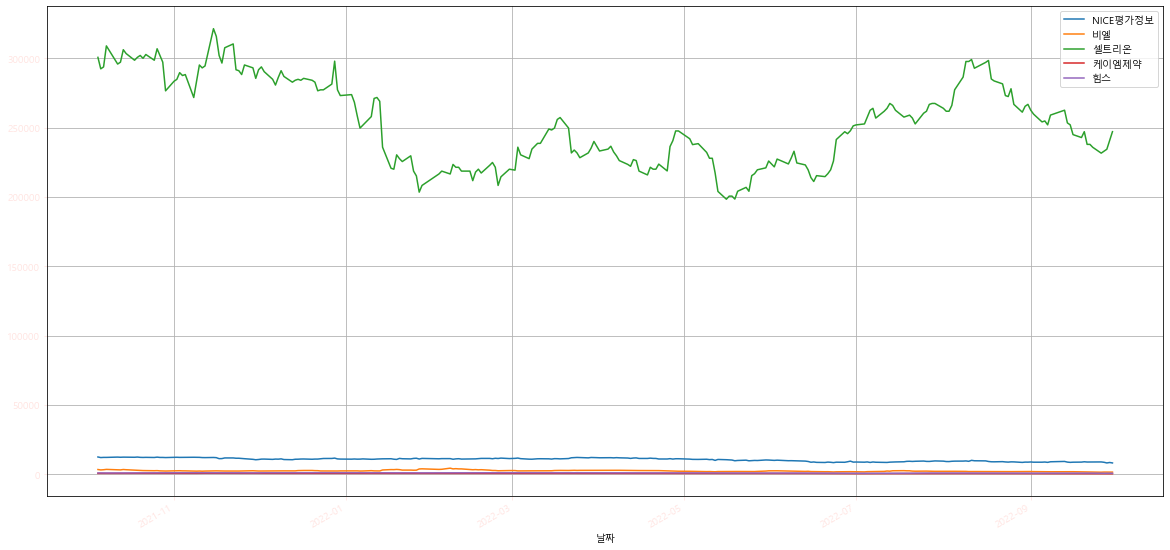

In [113]:
mc.plot()

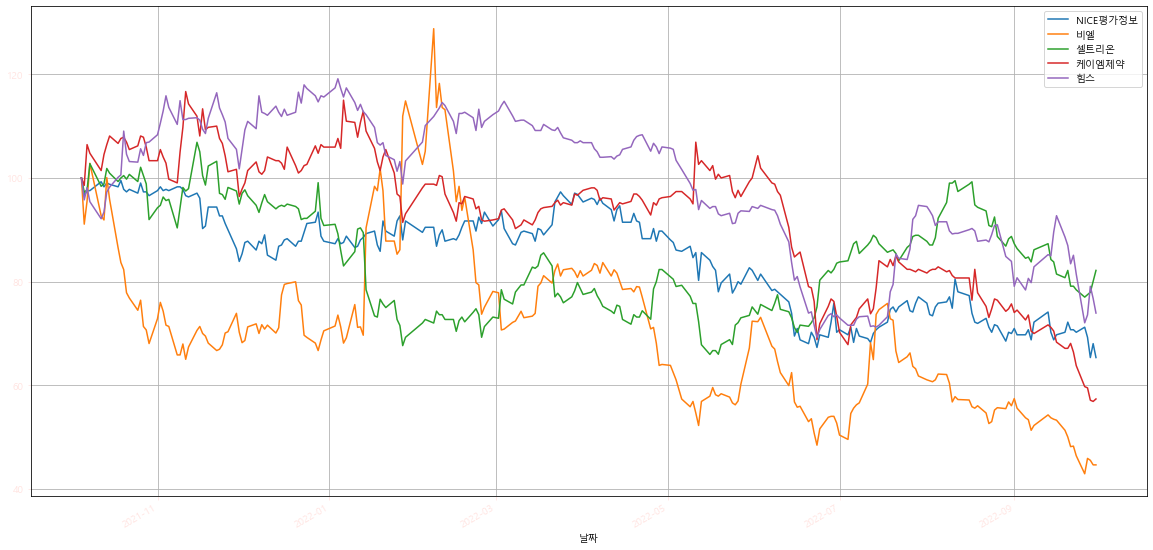

In [114]:
mc_rs.plot()

In [15]:
# 상장기업 Check
stock_list

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,000210,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시
1,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,078930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2525,코스텍시스템,169670,특수 목적용 기계 제조업,"반도체 웨이퍼 이송장비, 본딩장비",2022-01-21,12월,배준호,http://www.kosteks.com/,경기도
2526,타임기술,318660,소프트웨어 개발 및 공급업,"ILS(종합군수지원), IETM(전자식기술교범), CBT(전자식교보재), 기술번역",2021-06-24,12월,주양효,http://timett.co.kr,경상남도
2527,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
2528,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도
